- Broadband resonator model for SPS from Eq. 6.27 file:///home/natalia/Downloads/EPFL_TH4585%20(6).pdf

\begin{equation}
Z_{\perp}(f) = \frac{f_{res}}{f}\frac{R_s}{1+jQ(\frac{f}{f_{res}}-\frac{f_{res}}{f})},
\end{equation}

where $f$ is the frequency, $R_s$ is the transverse resonator shunt impedance, $f_{res}$ is the resonator frequency and $Q$ is the resonator quality factor.

- Computation of complex frequency shift from: Eq.6.207  https://www.slac.stanford.edu/~achao/WileyBook/WileyChapter6.pdf
CGS units are used. 

In [1]:
import numpy as np
from scipy.constants import m_p, c, e
import matplotlib.pyplot as plt

In [2]:
l = 0 # azimuthial mode (headtail mode)
# SPS parameters
clight = c*1e2 #[cm]/[s]
circum = 2 * np.pi * 1.1E3*1e2  # [cm]
f_0 = clight / circum  # revolution frequency in Hz
omega_0 = 2 * np.pi * f_0  # angular revolution frequency
Q_y = 26.18

In [3]:
# create the spectrum with discrete lines
nSideband = 350000 #int(np.floor((1E10/(f_0))))
sidebands_p = np.arange(-nSideband, nSideband+0.5)
omegas = omega_0*(sidebands_p+Q_y) # the middle is not zero due to the shift of q_y

In [4]:
f = omegas/(2*np.pi)

In [5]:
## Parameters of the broadband resonator 
f_res = 1e9 # Hz
omega_res = f_res*2*np.pi
R_shunt = 10e6 # Ohm/m
Q=1 # quality factor

In [6]:
Z = (f_res/f)*(R_shunt/(1+1j*(f/f_res-f_res/f)))

In [7]:
ImZ = np.imag(Z)
ReZ = np.real(Z)

/home/natalia/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


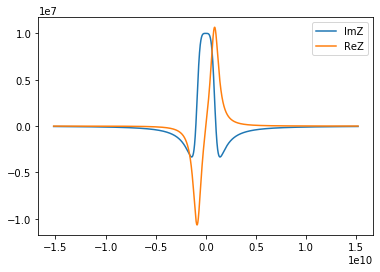

In [8]:
plt.plot(f, ImZ, label='ImZ')
plt.plot(f, ReZ, label='ReZ')
plt.legend()

### Compute the effective impedance

The effective impedance $Z_{eff}$ is described by:

$Z_{\perp eff}^{(l)} = \frac{\sum_{p=-\infty}^{+ \infty}Z_{\perp }^{(l)}(\omega_{p}) h_l(\omega_{p}-\omega_\xi)}{\sum_{p=-\infty}^{+ \infty}h_l(\omega_{p}-\omega_\xi)}$ (1)

with $\omega_p = (p+Q)\omega_0$ the discrete spectrum of the transverse bunch oscillations. $-\infty < p < + \infty$ for a single bunch (which is our case) or several bunches oscillating independently. $\omega_\xi=(\xi \omega_0)/(\eta \nu_b)$ the chromatic frequency, with $\eta$ the phase slip factor. Note that $\xi$ is the chromaticity defined as $\xi = d\nu_b/d\delta$ with $\delta=\Delta P/P_0$ the relative momentum error, and $Q^\prime=\xi/\nu_b$. Thus we can re-write $\omega_\xi=Q^\prime \omega_0 / \eta$. \textbf{Attention:} In the simulations $Q^\prime$ is referred as chromaticity.

Last, $h_l$, is the power spectral density of a Gaussian bunch of $l$ azimuthial mode. $h_l$ is described by \cite{Chao:collective} (Chapter Eq.6.143):
$h_l(\omega) = (\omega \sigma_z/c)^{2l} e^{-(\omega \sigma_z/c)^2}$ (2)
   
where $c$ is the speed of light in [m/s].

In [9]:
def hmm_gaus(omega, sigma_z, clight, l=0):
    return (omega*sigma_z/clight)**(2*l)*np.exp(-(omega*sigma_z/clight)**2)

In [10]:
### compute chromatic frequency shift

In [11]:
Qp_y = 0.0
gamma_t = 22.8  # for Q26

# Compute lorentz facotr
m0 = 0.9382720813e9 # proton rest mass, [eV/c^2]
E_rest = m0
E_0 = 270e9  # total energy of the reference particle [eV]
gamma = E_0/E_rest
eta = 1 / gamma_t ** 2 - 1 / gamma ** 2 # slip factor
omega_xi = Qp_y * omega_0 / eta

sigma_z = 27#15.5 # [cm] 

Text(0, 0.5, '$h_0(\\omega_p - \\omega_\\xi)$')

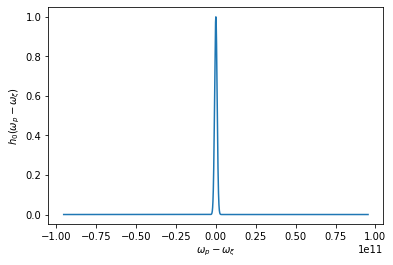

In [12]:
hs = hmm_gaus(omegas-omega_xi, sigma_z, clight=clight, l=0)
#hs = hmm_gaus_tau(omegas-omega_xi, tau)
plt.plot(omegas-omega_xi, hs)
plt.xlabel(r'$\omega_p - \omega_\xi$')
plt.ylabel(r'$h_0(\omega_p - \omega_\xi)$')

In [13]:
# compute effective impedance
Zeff_nominator = np.sum(ImZ*hs)
Zeff_denominator = np.sum(hs)
Zeff = Zeff_nominator/Zeff_denominator

print(f'Zeff = {Zeff} [Ohm/m]')

Zeff = 9992124.907335477 [Ohm/m]


### Convert in CGS units
- 1 [Ohm] = (1/9)*10**(-11) [s]/[cm]
- 1 [Ohm]/[m] = (1/9)*10**(-13) [s]/[cm]**2 

In [14]:
iZeff_cgs = Zeff*(1/9)*1e-13 #[s]/[cm]**2 iZeff of Eq.6.207

### Compute DQ (CGS units)

\begin{equation}
\Omega^{(l)}-\omega_{\beta}-l\omega_s = -\frac{1}{4\pi}\frac{\Gamma(l+1/2)}{2^l l!}\frac{N r_0 c^2}{\gamma T_0 \omega_\beta \sigma} jZ_{eff} \ \ (4)
\end{equation}

For l = 0 :

- $(\Gamma(1/2)=\sqrt{\pi}$
- $T_0 = 2\pi/\omega_0$
- $Q_y = \omega_\beta/\omega_0$

\begin{equation}
\Omega^{(l)}-\omega_{\beta} = -\frac{\sqrt{\pi}}{4\pi}\frac{N r_0 c^2}{\gamma \frac{2\pi}{\omega_0} \omega_\beta \sigma} jZ_{eff}  \ \ (5)
\end{equation}

which is written:
\begin{equation}
\Delta\Omega = -\frac{N r_0 c^2}{8\pi^{3/2}\gamma Q_y \sigma} jZ_{eff}   \ \ (6)
\end{equation}

Last, 

\begin{equation}
\Delta Q = \frac{\Delta \Omega^{(l)}}{\omega_0} \ \ (7)
\end{equation}


In [15]:
# Compute DQ
r_0 = 1.535 * 10 ** (-16) # [cm]
Nb = 3.5e10 #intensity_list[4] #3e10  # protons per bunch

### Eq.6.207 Chao, collective effects
Domega = -(Nb * r_0 * clight ** 2 * iZeff_cgs) / (8 * np.pi ** (3 / 2) * gamma * Q_y * sigma_z)


DQ_coh = Domega/omega_0
print(f'DQ_coh = {DQ_coh} ')
#DQ = -(beta*e*I_0*Zeff)/(4*sigma_z*np.sqrt(np.pi)*omega_0**2*gamma*26.18*m_p)


DQ_coh = -0.00021708108544798502 


In [16]:
# Compute DQ
r_0 = 1.535 * 10 ** (-16)

intensity_list = np.linspace(0, 5e10, 5) # protons per bunch

DQy_coh_list = []
for Nb in intensity_list:

    ### Eq.6.207 Chao, collective effects
    Domega = -(Nb * r_0 * clight ** 2 * iZeff_cgs) / (8 * np.pi ** (3 / 2) * gamma * Q_y * sigma_z)


    DQy_coh = Domega/omega_0
    print(f'DQ_coh = {DQy_coh} ')
    DQy_coh_list.append(DQy_coh)

DQ_coh = -0.0 
DQ_coh = -7.752895908856607e-05 
DQ_coh = -0.00015505791817713215 
DQ_coh = -0.0002325868772656982 
DQ_coh = -0.0003101158363542643 


In [17]:
print(DQy_coh_list)

[-0.0, -7.752895908856607e-05, -0.00015505791817713215, -0.0002325868772656982, -0.0003101158363542643]
